In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, SGDRegressor

from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

In [5]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X ** 2 + 0.9 * X + 2 + np.random.randn(200, 1)

# y = 0.8x^2 + 0.9x + 2

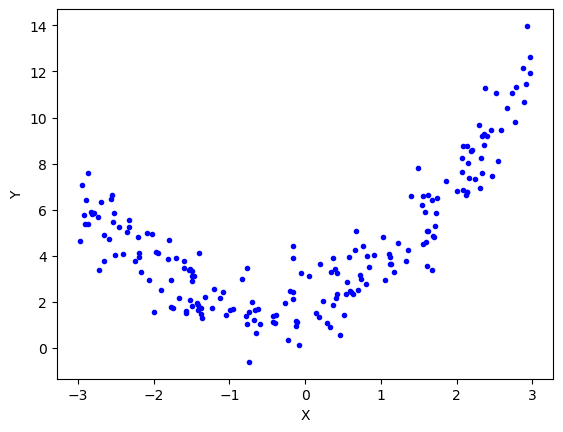

In [6]:
plt.plot(X, y, 'b.')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [8]:
# Applying Linear Regression
lr = LinearRegression()

In [9]:
lr.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = lr.predict(X_test)

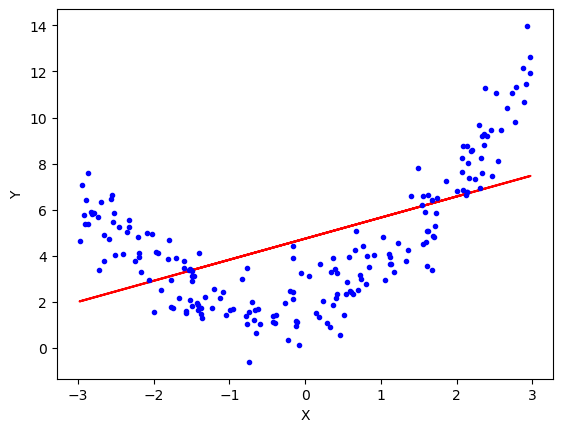

In [12]:
plt.plot(X_train, lr.predict(X_train), color="r")
plt.plot(X, y, 'b.')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [13]:
r2_score(y_test, y_pred)

-0.16790537235049974

In [14]:
#Appling Ploynomial Linaer Regresion
#degree 2

poly = PolynomialFeatures(degree=2)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [15]:
print(X_train[0])
print(X_train_trans[0])

[2.14546807]
[1.         2.14546807 4.60303323]


In [17]:
lr = LinearRegression()
lr.fit(X_train_trans, y_train)

LinearRegression()

In [20]:
r2_score(y_test, lr.predict(X_test_trans))

0.8011312030430978

In [21]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.92089216 0.82694118]]
[1.96332233]


In [22]:
X_new= np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

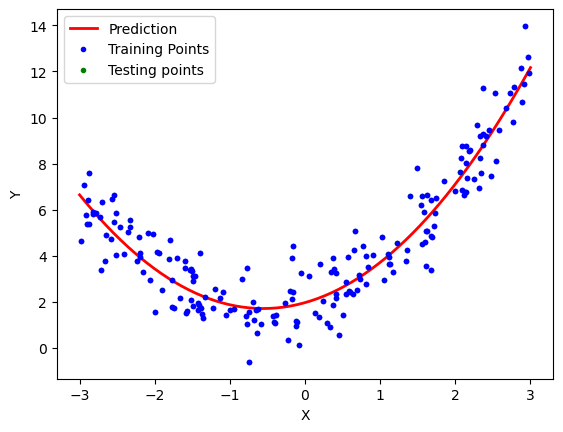

In [25]:
plt.plot(X_new, y_new, "r-", linewidth=2 , label ="Prediction")
plt.plot(X_train, y_train, "b.", label="Training Points")
plt.plot(X_test, y_test, "g.", label="Testing points")
plt.plot(X, y, 'b.')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()